**Trabalhando com datas**

In [1]:
#Importando a Biblioteca
import pandas as pd

In [2]:
#Leitura dos Arquivos
df01 = pd.read_excel("Aracaju.xlsx")
df02 = pd.read_excel("Fortaleza.xlsx")
df03 = pd.read_excel("Natal.xlsx")
df04 = pd.read_excel("Recife.xlsx")
df05 = pd.read_excel("Salvador.xlsx")

In [3]:
#unificação dos 5 arquivos
df = pd.concat([df01,df02,df03,df04,df05])

In [4]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [5]:
# Converte o tipo de dado da coluna "LojaID" para "object" (tipicamente usado para dados categóricos ou texto)
df["LojaID"] = df["LojaID"].astype("object")

In [6]:
df.dtypes

,0
Cidade,object
Data,datetime64[ns]
Vendas,float64
LojaID,object
Qtde,int64


In [7]:
# Cria uma nova coluna chamada "Receita"
# A coluna "Receita" é calculada multiplicando os valores da coluna "Vendas" pelos valores da coluna "Qtde".
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [8]:
# Converte a coluna "Data" para o tipo "int64"
df["Data"] = df["Data"].astype("int64")

In [9]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,1514764800000000000,142.00,1520,1,142.00
1,Aracaju,1514764800000000000,14.21,1522,6,85.26
2,Aracaju,1514764800000000000,71.55,1520,1,71.55
3,Aracaju,1514764800000000000,3.01,1521,7,21.07
4,Aracaju,1514764800000000000,24.51,1522,8,196.08


In [10]:
#verificando o tipo da coluna
df.dtypes

,0
Cidade,object
Data,int64
Vendas,float64
LojaID,object
Qtde,int64
Receita,float64


In [11]:
# Converte a coluna "Data" de tipo inteiro (ou string) para o tipo de dado datetime
# O método "pd.to_datetime()" converte a coluna para um formato de data e hora.
df["Data"] = pd.to_datetime(df["Data"])

In [12]:
df.dtypes

,0
Cidade,object
Data,datetime64[ns]
Vendas,float64
LojaID,object
Qtde,int64
Receita,float64


In [13]:
# Agrupa os dados por ano (extraído da coluna "Data") e calcula a soma da coluna "Receita" para cada ano
# O método "dt.year" extrai o ano da coluna "Data" e o "sum()" soma os valores da coluna "Receita" para cada ano.
df.groupby(df["Data"].dt.year)["Receita"].sum()

,Receita
Data,
2018,118176.53
2019,228246.45


In [14]:
# Cria uma nova coluna chamada "Ano_Venda" contendo apenas o ano extraído da coluna "Data"
# O método "dt.year" extrai o ano da data e o armazena na nova coluna "Ano_Venda".
df["Ano_Venda"] = df["Data"].dt.year

In [15]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
129,Natal,2019-01-02,125.66,1037,1,125.66,2019
63,Fortaleza,2019-01-01,118.17,1004,1,118.17,2019
172,Natal,2019-01-02,6.70,1035,1,6.70,2019
74,Recife,2019-01-01,38.79,983,6,232.74,2019
37,Recife,2019-01-01,136.36,980,7,954.52,2019


In [16]:
# Extrai o mês e o dia da coluna "Data" e cria duas novas colunas: "Mes_Venda" e "Dia_Venda"
# O método "dt.month" extrai o mês e "dt.day" extrai o dia da data, armazenando-os nas novas colunas.
df["Mes_Venda"], df["Dia_Venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [17]:
# Retorna uma amostra aleatória de 5 linhas do DataFrame "df"
# O método "sample(5)" seleciona 5 registros aleatórios para visualização ou análise.
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda
106,Natal,2019-01-02,149.19,1035,2,298.38,2019,1,2
32,Natal,2019-03-17,244.00,854,2,488.00,2019,3,17
22,Fortaleza,2019-01-01,150.32,1005,1,150.32,2019,1,1
116,Recife,2019-03-02,79.10,982,2,158.20,2019,3,2
146,Natal,2019-01-02,149.88,1037,1,149.88,2019,1,2


In [18]:
# Retorna a data mais antiga presente na coluna "Data"
# O método "min()" encontra o menor valor na coluna "Data", que neste caso é a data mais antiga.
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [20]:
# Calcula a diferença em dias entre cada data na coluna "Data" e a data mais antiga (mínima) do DataFrame
# O resultado é armazenado na nova coluna "Diferenca_Dias", representando o número de dias desde a data mais antiga.
df["Diferenca_Dias"] = df["Data"] - df["Data"].min()

In [21]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias
216,Salvador,2019-01-02,5.82,1035,1,5.82,2019,1,2,366 days
29,Natal,2019-03-09,646.00,854,2,1292.00,2019,3,9,432 days
7,Fortaleza,2019-02-11,35.50,1003,2,71.00,2019,2,11,406 days
49,Natal,2019-04-01,831.00,852,2,1662.00,2019,4,1,455 days
77,Fortaleza,2019-01-01,167.64,1005,1,167.64,2019,1,1,365 days


In [22]:
# Cria uma nova coluna chamada "Trimestre_Vendas" contendo o trimestre de cada data na coluna "Data"
# O método "dt.quarter" extrai o trimestre (1 a 4) da data e armazena na nova coluna.
df["Trimestre_Vendas"] = df["Data"].dt.quarter

In [23]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre_Vendas
126,Aracaju,2018-01-01,13.41,1520,7,93.87,2018,1,1,0 days,1
101,Fortaleza,2019-01-01,11.67,1005,4,46.68,2019,1,1,365 days,1
125,Fortaleza,2019-03-02,37.60,983,4,150.40,2019,3,2,425 days,1
17,Aracaju,2018-01-01,162.19,1522,9,1459.71,2018,1,1,0 days,1
78,Salvador,2019-01-01,111.20,1036,3,333.60,2019,1,1,365 days,1


In [24]:
# Filtra as vendas do DataFrame "df" para o ano de 2019 e o mês de março
# A condição verifica se o ano é 2019 e o mês é março (mês 3) na coluna "Data".
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [25]:
# Retorna uma amostra aleatória de 20 linhas do DataFrame "vendas_marco_19"
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre_Vendas
131,Salvador,2019-03-02,63.48,1037,3,190.44,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
109,Recife,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
123,Fortaleza,2019-03-02,20.22,981,6,121.32,2019,3,2,425 days,1
122,Salvador,2019-03-02,13.27,1037,1,13.27,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
108,Recife,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
124,Salvador,2019-03-02,44.82,1034,3,134.46,2019,3,2,425 days,1
137,Recife,2019-03-02,51.99,983,3,155.97,2019,3,2,425 days,1


**Visualização de dados**

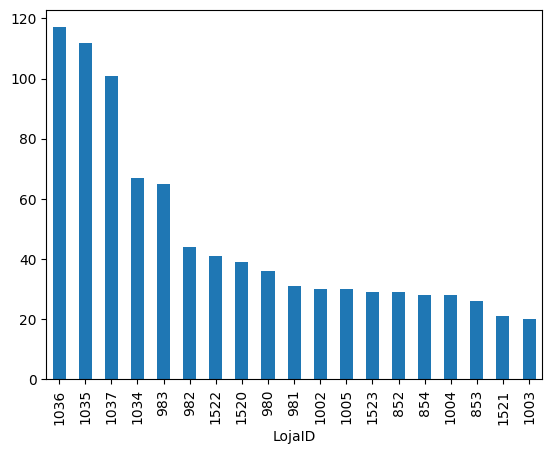

In [26]:
# Cria um gráfico de barras verticais para visualizar a contagem de valores únicos na coluna "LojaID"
# O método "value_counts()" conta as ocorrências de cada valor na coluna "LojaID", e "plot.bar()" gera o gráfico de barras verticais.
df['LojaID'].value_counts(ascending=False).plot.bar();

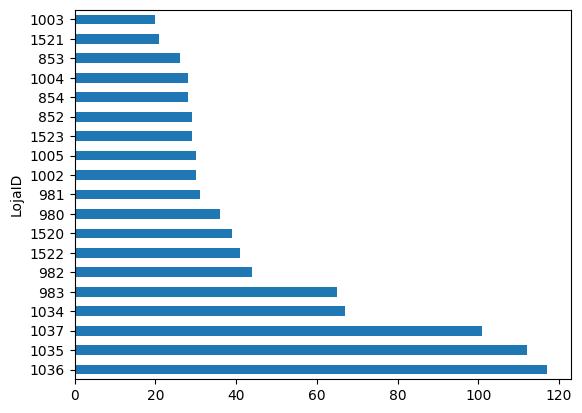

In [27]:
# Cria um gráfico de barras horizontais para visualizar a contagem de valores únicos na coluna "LojaID"
# O método "value_counts()" conta as ocorrências de cada valor na coluna "LojaID", e "plot.barh()" gera o gráfico de barras horizontais.
df['LojaID'].value_counts().plot.barh();

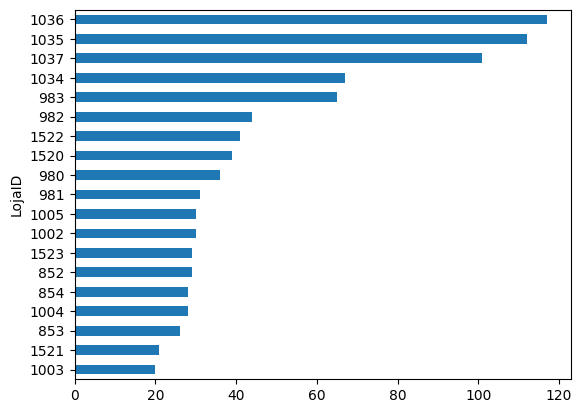

In [28]:
# Cria um gráfico de barras horizontais para visualizar a contagem de valores únicos na coluna "LojaID",
# ordenando do menor para o maior valor. O parâmetro "ascending=True" inverte a ordem das barras.
# O ponto e vírgula no final do código serve para ocultar a linha de saída do gráfico.
df['LojaID'].value_counts(ascending=True).plot.barh();

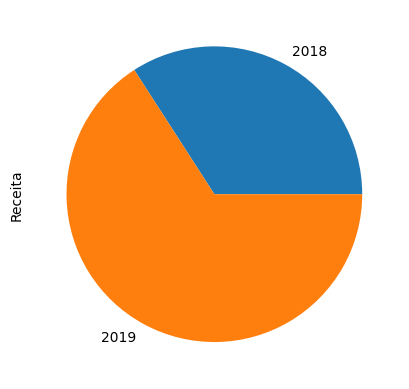

In [29]:
# Cria um gráfico de pizza para visualizar a soma da "Receita" por ano
# O método "groupby(df['Data'].dt.year)" agrupa os dados pelo ano da coluna "Data",
# e "sum()" calcula a soma da receita para cada ano. "plot.pie()" gera o gráfico de pizza.
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [30]:
# Conta a quantidade de ocorrências de cada valor na coluna "Cidade"
# O método "value_counts()" retorna a contagem de valores únicos presentes na coluna "Cidade".
df["Cidade"].value_counts()

,count
Cidade,
Natal,240
Salvador,240
Fortaleza,142
Recife,142
Aracaju,130


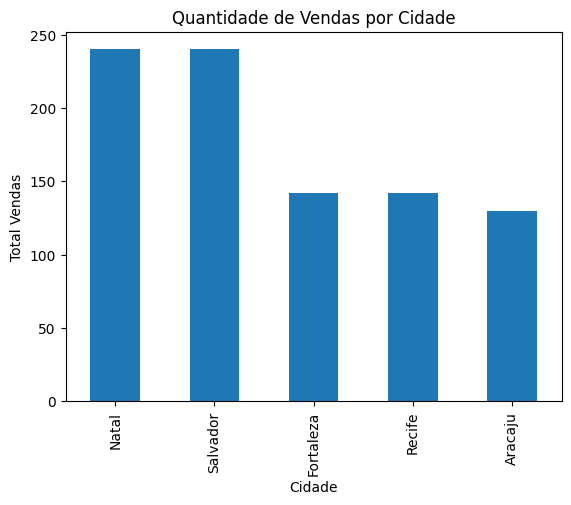

In [31]:
# Importa a biblioteca "matplotlib.pyplot" para criar gráficos.
# Cria um gráfico de barras para visualizar a quantidade de vendas por cidade.
# O método "value_counts()" conta as ocorrências de cada valor na coluna "Cidade", e "plot.bar()" gera o gráfico de barras.
# O título do gráfico é definido como "Quantidade de Vendas por Cidade", e os rótulos dos eixos X e Y são configurados para "Cidade" e "Total Vendas", respectivamente.
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title="Quantidade de Vendas por Cidade");
plt.xlabel("Cidade");
plt.ylabel("Total Vendas");


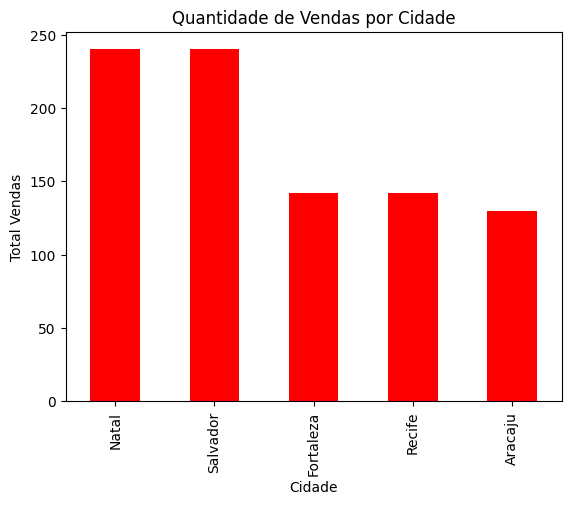

In [32]:
# Cria um gráfico de barras para visualizar a quantidade de vendas por cidade, com a cor das barras definida como "red".
# O método "value_counts()" conta as ocorrências de cada valor na coluna "Cidade", e "plot.bar()" gera o gráfico de barras.
# O título do gráfico é definido como "Quantidade de Vendas por Cidade", e os rótulos dos eixos X e Y são configurados para "Cidade" e "Total Vendas", respectivamente.
# A cor das barras é definida pelo parâmetro "color".
df['Cidade'].value_counts().plot.bar(title="Quantidade de Vendas por Cidade", color="red");
plt.xlabel("Cidade");
plt.ylabel("Total Vendas");

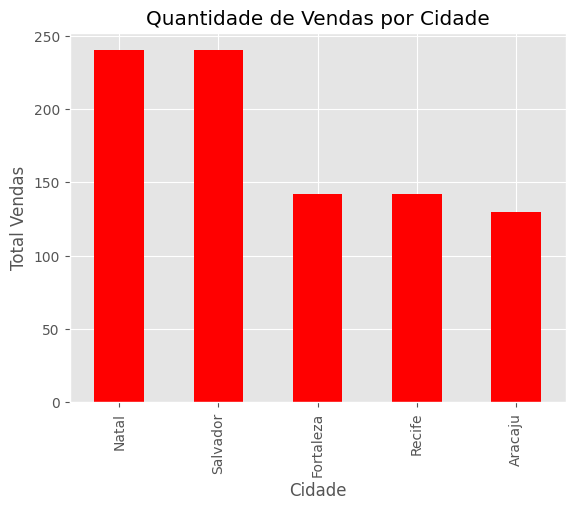

In [33]:
# Altera o estilo do gráfico para "ggplot", que aplica um estilo visual semelhante ao utilizado no R.
# Cria um gráfico de barras para visualizar a quantidade de vendas por cidade, com a cor das barras definida como "red".
# O método "value_counts()" conta as ocorrências de cada valor na coluna "Cidade", e "plot.bar()" gera o gráfico de barras.
# O título do gráfico é definido como "Quantidade de Vendas por Cidade", e os rótulos dos eixos X e Y são configurados para "Cidade" e "Total Vendas", respectivamente.
plt.style.use("ggplot")
df['Cidade'].value_counts().plot.bar(title="Quantidade de Vendas por Cidade", color="red");
plt.xlabel("Cidade");
plt.ylabel("Total Vendas");

In [34]:
# Altera o estilo global dos gráficos para "ggplot", aplicando um visual similar ao estilo do R.
# Isso afeta todos os gráficos subsequentes, dando-lhes uma aparência mais limpa e moderna.
plt.style.use("ggplot")

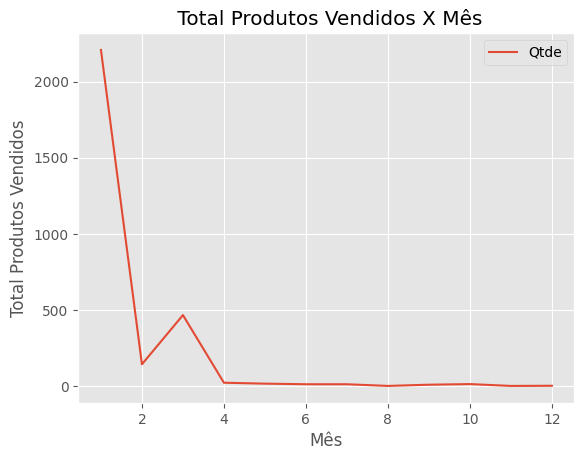

In [35]:
# Agrupa os dados pelo mês da coluna "Mes_Venda" e calcula a soma da coluna "Qtde" (quantidade de produtos vendidos) para cada mês.
# O método "plot()" gera o gráfico, e o parâmetro "marker='v'" adiciona marcadores em formato de triângulo invertido nas linhas do gráfico.
# Os eixos X e Y são rotulados como "Mês" e "Total Produtos Vendidos", respectivamente, e a legenda é ativada com "plt.legend()".
df.groupby(df["Mes_Venda"])["Qtde"].sum().plot(title=" Total Produtos Vendidos X Mês");
plt.xlabel("Mês");
plt.ylabel("Total Produtos Vendidos");
plt.legend();

In [37]:
# Agrupa os dados pelo mês da coluna "Mes_Venda" e calcula a soma da quantidade de produtos vendidos ("Qtde") para cada mês.
# O resultado é uma série com o total de vendas por mês.
df.groupby(df["Mes_Venda"])["Qtde"].sum()

,Qtde
Mes_Venda,
1,2208
2,144
3,467
4,23
5,17
6,13
7,13
8,2
9,10


In [39]:
# Cria um novo DataFrame chamado "df_2019" contendo apenas os registros em que o ano da venda ("Ano_Venda") é igual a 2019.
df_2019 = df[df["Ano_Venda"] == 2019]

In [40]:
df_2019.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre_Vendas
7,Aracaju,2019-01-01,172.22,1522,6,1033.32,2019,1,1,365 days,1
8,Aracaju,2019-01-01,12.16,1523,1,12.16,2019,1,1,365 days,1
9,Aracaju,2019-01-01,149.36,1523,3,448.08,2019,1,1,365 days,1
10,Aracaju,2019-01-01,42.34,1522,6,254.04,2019,1,1,365 days,1
11,Aracaju,2019-01-01,161.53,1520,4,646.12,2019,1,1,365 days,1


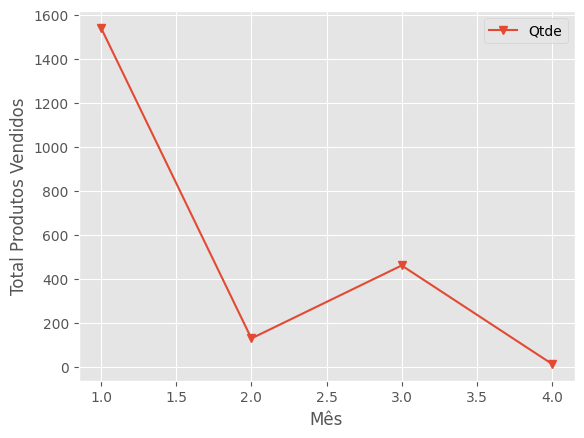

In [44]:
#Total de produtos vendidos por mes
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker='v');
plt.xlabel("Mês");
plt.ylabel("Total Produtos Vendidos");
plt.legend();

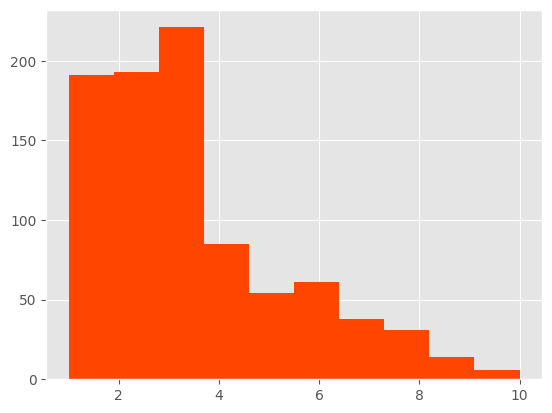

In [52]:
# Cria um histograma para visualizar a distribuição da quantidade de produtos vendidos ("Qtde").
# Definiçõa de cor em color.
plt.hist(df["Qtde"], color="orangered");

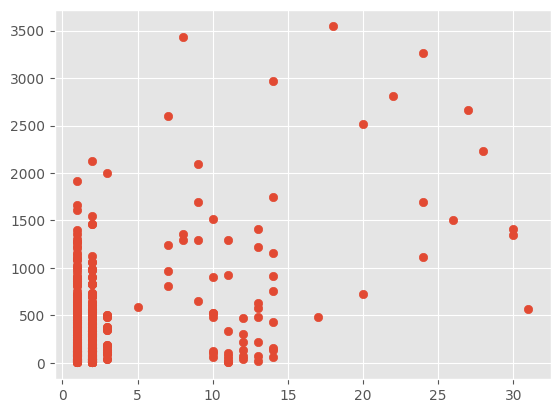

In [54]:
# Cria um gráfico de dispersão (scatter plot) com os dados de 2019.
# O eixo X representa o dia da venda ("Dia_Venda") e o eixo Y representa a receita ("Receita").
plt.scatter(x=df_2019["Dia_Venda"], y=df_2019["Receita"]);

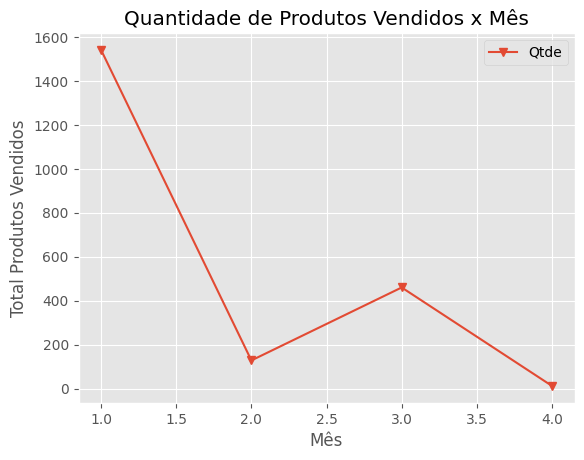

In [55]:
# Cria um gráfico de linha mostrando a quantidade de produtos vendidos por mês no ano de 2019.
# O agrupamento é feito pela coluna "Mes_Venda", e a soma da quantidade ("Qtde") é calculada para cada mês.
# O parâmetro "marker='v'" adiciona marcadores em forma de triângulo invertido.
# Títulos e rótulos dos eixos são definidos para melhor entendimento do gráfico.
# A legenda é exibida com "plt.legend()".
# Para salvar o gráfico como imagem PNG, use: plt.savefig("grafico_vendas_2019.png")
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker='v');
plt.title("Quantidade de Produtos Vendidos x Mês");
plt.xlabel("Mês");
plt.ylabel("Total Produtos Vendidos");
plt.legend();
# plt.savefig("grafico_vendas_2019.png")  # ← descomente esta linha para salvar o gráfico